# Topological Sort

In a nutshell Toposort is an algorithm to sort the nodes in a graph such that if a node $u$ has an edge pointing to node $v$ than $u$ will come before $v$ in the ordering.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from helper import draw_graph, clear_marks

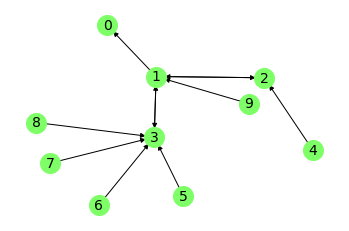

In [32]:
G = nx.gn_graph(10)
G.add_edges_from([(1, 2), (1, 3)])

draw_graph(G)

The algorithm for topo-sort is very easy to understand/implement. Here's the pseudocode:

```
function toposort(G):
    while there are nodes in G:
        Pick a random node in G with in-degree == 0
        if no nodes found:
            STOP --> the graph can't be topologically sorted
        else:
            remove the chosen node and all of 
                it's outgoing edges from the graph
                and append the node to the output.
```

When we remove the node along with all its outgoing edges, the in-degrees of the nodes adjacent to the outging edges decrease by 1.

__Notice that in order for toposort to work there can be no cycles in the graph, otherwise we would have a circular dependency and none of the nodes in the cycle will ever reach in-degree == 0.__

In [33]:
# else block is only executed if for loop
# finished normally, i.e. no breaks encountered
def toposort(G):
    G = G.copy()
    nodes_sort = []
    while G.nodes:
        for node in G:
            if G.in_degree(node) == 0:
                nodes_sort.append(node)
                G.remove_node(node)
                break
        else:
            print('There is no topological sort for this graph.')
            raise ValueError('Graph contains a cycle', G)

    return nodes_sort

## Results

In [52]:
try:
    output = toposort(G)
except Exception as e:
    print(e)
else:
    for node in output[:-1]:
        print(f'{node} --> ', end='')
    print(output[-1])

5 --> 8 --> 7 --> 6 --> 4 --> 1 --> 2 --> 3 --> 9 --> 0


# Other implementations

Other implementations of toposort might use a stack or a queue to maintain a list of nodes with in-degree=0. In our case above this wasn't necessary since we could just iterate over each node and check if its in-degree was 0. After deleting the node from the graph, all the in-degrees of its neighbors automatically decreased by 1. For this reason the algorithm above is very clean, but it comes at the tradeoff of having to make a copy of our graph everytime we run toposort.

In any case, we'll implement each version of the algorithm for completeness. In each iteration we pop/dequeue a node which then gets saved to the output. __REMEMBER:__ All nodes in the stack/queue already have an in-degree=0.

This version of the algorithm terminates when the stack/queue is empty. We know there is no possible toposort if the algorithm terminates and not all the nodes in the graph are in our output. 

# Queue implementation

In [50]:
def topo_queue(G):
    output = []
    deg0_queue = deque()
    degrees = {node: 0 for node in G.nodes}
    
    # calc in-degrees of each node
    for node, neighbors in G.adj.items():
        for neighbor in neighbors:
            degrees[neighbor] += 1
            
    # enqueue all nodes with degree=0
    for node, deg in degrees.items():
        if deg == 0:
            deg0_queue.append(node)
    
    while deg0_queue:
        node = deg0_queue.popleft()
        output.append(node)
        for neighbor in G.adj[node]:
            degrees[neighbor] -= 1
            if degrees[neighbor] == 0:
                deg0_queue.append(neighbor)
    
    if len(set(G.nodes) - set(output)) > 0:
        raise Exception('There is no topological sort for this graph.')
    else:
        return output
            

In [53]:
try:
    output = topo_queue(G)
except Exception as e:
    print(e)
else:
    for node in output[:-1]:
        print(f'{node} --> ', end='')
    print(output[-1])

5 --> 8 --> 9 --> 7 --> 6 --> 4 --> 1 --> 2 --> 3 --> 0
